In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pmdarima as pm

In [51]:
# Load the data
file_path = '/Users/jordannelson/Documents/OneDrive - UWE Bristol Merla Pumffrey/Masters Project/Data/Department for Energy Security and Net Zero Regional Data/SW all data cleaned.xlsx'

#Read each sheet of the excel file
generation_df = pd.read_excel(file_path, sheet_name='Generation (GWh)')
capacity_df = pd.read_excel(file_path, sheet_name='Installed Capacity (MW)')
sites_df = pd.read_excel(file_path, sheet_name='Number of Sites')
gva_df = pd.read_excel(file_path, sheet_name='Generation per GVA')
uc_lf_df = pd.read_excel(file_path, sheet_name='UC LF')

#Load Weather England data
weather_df = pd.read_excel('/Users/jordannelson/Documents/OneDrive - UWE Bristol Merla Pumffrey/Masters Project/Data/Solar PV Weather.xlsx')

# Basic Time Series - Solar PV

In [54]:
# Ensure the 'Year' is parsed as a datetime object correctly
generation_df['Year'] = pd.to_datetime(generation_df['Year'], format='%Y')

# Set 'Year' as the index
solar_generation = generation_df[['Year', 'Solar PV']].set_index('Year')

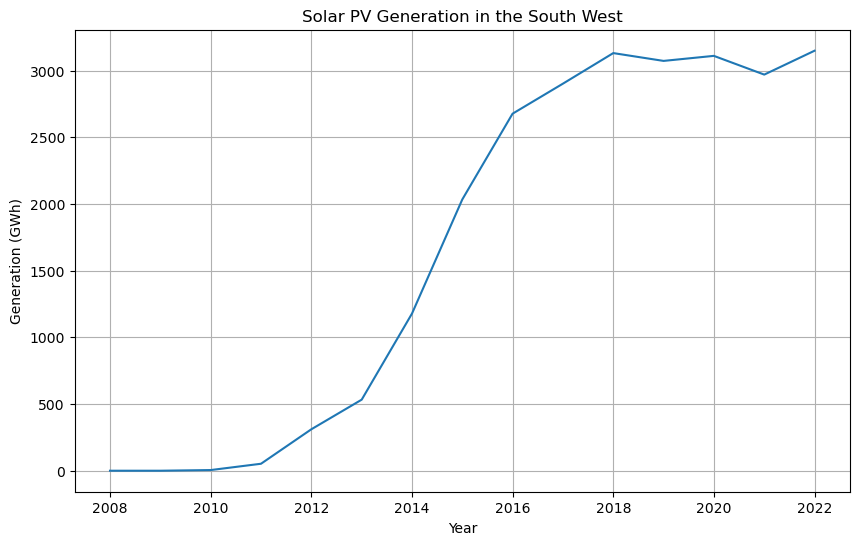

In [56]:
# Plot to check the data
plt.figure(figsize=(10, 6))
plt.plot(solar_generation, label='Solar PV Generation')
plt.title('Solar PV Generation in the South West')
plt.xlabel('Year')
plt.ylabel('Generation (GWh)')
plt.grid(True)
plt.show()

In [58]:
# Automatically determine the optimal p, d, q values
model = pm.auto_arima(solar_generation['Solar PV'], seasonal=False, trace=True)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=191.181, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=201.935, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=195.864, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=198.272, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=206.739, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=198.057, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=197.558, Time=0.03 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=193.139, Time=0.07 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=198.155, Time=0.04 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] intercept
Total fit time: 0.85

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   15
Model:               SARIMAX(2, 1, 2)   Log Likelihood                 -89.591
Date:                Sat, 31 Aug 2024   AIC                            191.181
Time:                        08:17:02   BIC                            195.016
Sample:                    01-01-2008   HQIC                           190.826
                         - 01-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    123.6708     28.382      4.357      0.000      68.043     179.298
ar.L1          1.5707      0.089     17.570      0.000       1.396       1.746
ar.L2         -0.9726      0.084    -11.642      0.000      -1.136      -0.809
ma.L1         -1.8776      0.794     -2.365      0.018      -3.434      -0.322
ma.L2          0.8801      0.836      1.052      0.293      -0.759       2.519
sigma2      1.257e+04      0.000   1.01e+08      0.000    1.26e+04    1.26e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):                 0.84
Prob(Q):                              0.69   Prob(JB):                         0.66
Heteroskedasticity (H):               1.23   Skew:                             0.19
Prob(H) (two-sided):                  0.82   Kurtosis:                         1.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.23e+26. Standard errors may be unstable.
"""

In [60]:
# Fit the ARIMA model
model = ARIMA(solar_generation, order=(2, 1, 2))  
model_fit = model.fit()

# Make predictions
forecast = model_fit.forecast(steps=5)  # Predict the next 5 years
print(forecast)

2023-01-01    3253.692366
2024-01-01    3459.529821
2025-01-01    3469.007711
2026-01-01    3600.787566
2027-01-01    3569.284790
Freq: AS-JAN, Name: predicted_mean, dtype: float64


/Users/jordannelson/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/jordannelson/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/jordannelson/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [62]:
# Evaluate the model
predictions = model_fit.predict(start=0, end=len(solar_generation)-1, typ='levels')
mae = mean_absolute_error(solar_generation, predictions)
rmse = np.sqrt(mean_squared_error(solar_generation, predictions))
print(f'MAE: {mae}, RMSE: {rmse}')

MAE: 133.84584526974734, RMSE: 183.9806744191029


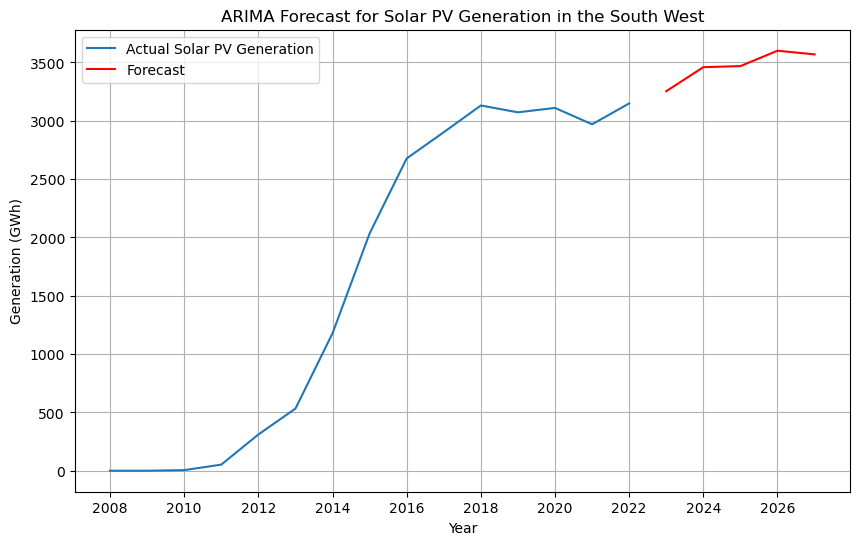

In [64]:
# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(solar_generation.index, solar_generation['Solar PV'], label='Actual Solar PV Generation')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast for Solar PV Generation in the South West')
plt.xlabel('Year')
plt.ylabel('Generation (GWh)')
plt.legend()
plt.grid(True)
plt.show()

## Capacity

In [67]:
# Ensure the 'Year' is parsed as a datetime object correctly
capacity_df['Year'] = pd.to_datetime(generation_df['Year'], format='%Y')

# Set 'Year' as the index
solar_capacity = capacity_df[['Year', 'Solar PV']].set_index('Year')

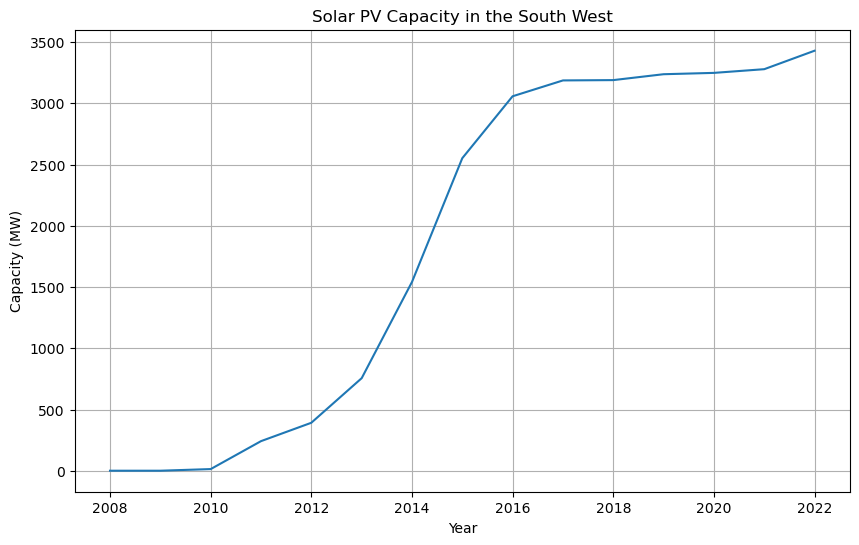

In [69]:
# Plot to check the data
plt.figure(figsize=(10, 6))
plt.plot(solar_capacity, label='Solar PV Capacity')
plt.title('Solar PV Capacity in the South West')
plt.xlabel('Year')
plt.ylabel('Capacity (MW)')
plt.grid(True)
plt.show()

In [71]:
# Automatically determine the optimal p, d, q values
model = pm.auto_arima(solar_capacity['Solar PV'], seasonal=False, trace=True)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=203.915, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=196.937, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=195.670, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=208.878, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=194.603, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=194.799, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=193.083, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=194.968, Time=0.04 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=196.794, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=194.698, Time=0.02 sec

Best model:  ARIMA(2,1,0)(0,0,0)[0] intercept
Total fit time: 0.469 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   15
Model:               SARIMAX(2, 1, 0)   Log Likelihood                 -92.541
Date:                Sat, 31 Aug 2024   AIC                            193.083
Time:                        08:17:23   BIC                            195.639
Sample:                    01-01-2008   HQIC                           192.846
                         - 01-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    128.1875     86.000      1.491      0.136     -40.370     296.745
ar.L1          1.0821      0.333      3.245      0.001       0.429       1.736
ar.L2         -0.5766      0.452     -1.276      0.202      -1.462       0.309
sigma2      2.942e+04   1.74e+04      1.692      0.091   -4660.112    6.35e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):                 0.63
Prob(Q):                              0.69   Prob(JB):                         0.73
Heteroskedasticity (H):               0.29   Skew:                             0.42
Prob(H) (two-sided):                  0.20   Kurtosis:                         2.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [73]:
# Fit the ARIMA model
model = ARIMA(solar_capacity, order=(2, 1, 0))  
model_fit = model.fit()

# Make predictions
forecast = model_fit.forecast(steps=5)  # Predict the next 5 years
print(forecast)

2023-01-01    3591.762466
2024-01-01    3714.199397
2025-01-01    3785.481194
2026-01-01    3814.673732
2027-01-01    3817.353297
Freq: AS-JAN, Name: predicted_mean, dtype: float64


/Users/jordannelson/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/jordannelson/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/jordannelson/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [75]:
# Evaluate the model
predictions = model_fit.predict(start=0, end=len(solar_capacity)-1, typ='levels')
mae = mean_absolute_error(solar_capacity, predictions)
rmse = np.sqrt(mean_squared_error(solar_capacity, predictions))
print(f'MAE: {mae}, RMSE: {rmse}')

MAE: 135.2167192901256, RMSE: 187.89641508326181


In [77]:
# Load the combined quarterly data
file_path = '/Users/jordannelson/Documents/OneDrive - UWE Bristol Merla Pumffrey/Masters Project/Data/Combined_df.xlsx'
combined_df = pd.read_excel(file_path)
combined_df['Date'] = pd.to_datetime(combined_df[['Year', 'Month']].assign(DAY=1))
combined_df.set_index('Date', inplace=True)
combined_df.drop(columns=['Year', 'Month'], inplace=True)

# Inspect the data
print(combined_df.head())

            Installed Capacity (MW)  Load Factor (%)  Generation (MW)  \
Date                                                                    
2011-01-01               241.621120             6.22        15.028834   
2011-04-01               279.103527            17.19        47.977896   
2011-07-01               316.585935            13.57        42.960711   
2011-10-01               354.068342             3.53        12.498612   
2012-01-01               391.550750             7.06        27.643483   

            Generation (GWh)  Average Temperature  Average daily sun hours  
Date                                                                        
2011-01-01        131.739870             5.631481                 2.615393  
2011-04-01        420.565028            12.642491                 6.967222  
2011-07-01        376.585347            15.285404                 5.326767  
2011-10-01        109.560437             9.275311                 2.463080  
2012-01-01        242.3174

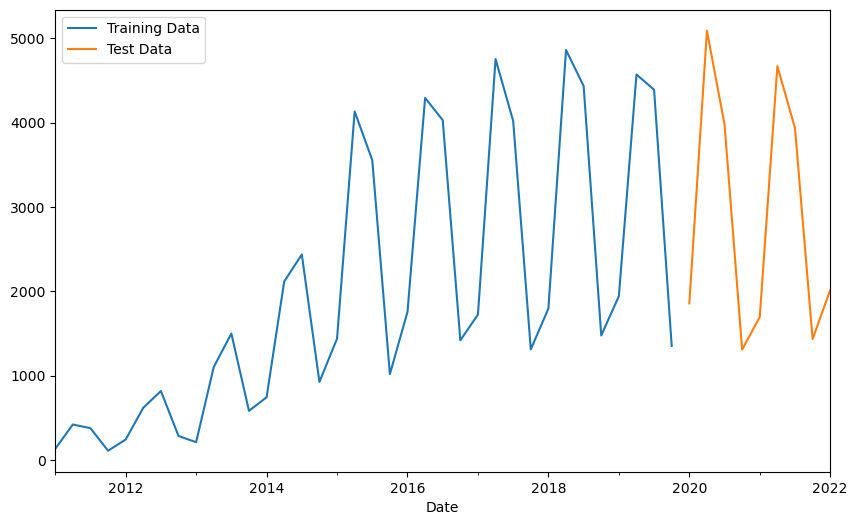

In [79]:
# Define the size of the training dataset
train_size = int(len(combined_df) * 0.8)
train, test = combined_df.iloc[:train_size], combined_df.iloc[train_size:]

# Visualise the training and testing data
train['Generation (GWh)'].plot(figsize=(10, 6), label='Training Data')
test['Generation (GWh)'].plot(figsize=(10, 6), label='Test Data')
plt.legend()
plt.show()


In [81]:
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Define the p, d, q, P, D, Q ranges for SARIMA
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 4) for x in pdq]  # Quarterly data

best_aic = float("inf")
best_params = None

# Grid search for the best parameters
for param in pdq:
    for seasonal_param in seasonal_pdq:
        try:
            model = SARIMAX(train['Generation (GWh)'],
                            order=param,
                            seasonal_order=seasonal_param,
                            enforce_stationarity=False,
                            enforce_invertibility=False)
            results = model.fit()
            if results.aic < best_aic:
                best_aic = results.aic
                best_params = (param, seasonal_param)
        except Exception as e:
            continue

print(f'Best SARIMA params: {best_params}, AIC: {best_aic}')


/Users/jordannelson/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/Users/jordannelson/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/jordannelson/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/Users/jordannelson/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/jordannelson/anaconda3/li

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.00580D+00    |proj g|=  1.10157D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1      3      1     0     0   9.420D-06   9.006D+00
  F =   9.0057448576567189     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.2

/Users/jordannelson/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/Users/jordannelson/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/jordannelson/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/Users/jordannelson/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/jordannelson/anaconda3/li

At iterate    0    f=  7.30109D+00    |proj g|=  4.08921D-01

At iterate    5    f=  7.19825D+00    |proj g|=  2.95097D-04

At iterate   10    f=  7.19822D+00    |proj g|=  6.31760D-03

At iterate   15    f=  7.19412D+00    |proj g|=  8.59773D-02

At iterate   20    f=  7.01202D+00    |proj g|=  4.33636D-02

At iterate   25    f=  6.99040D+00    |proj g|=  6.97490D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     26     34      1     0     0   1.701D-07   6.990D+00
  F =   6.9904011551714760     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine

 This problem is unconstrained.
/Users/jordannelson/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/Users/jordannelson/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/jordannelson/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/Users/jordannelson/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  7.19003D+00    |proj g|=  1.16411D-02

At iterate   20    f=  6.56241D+00    |proj g|=  5.56647D-01

At iterate   25    f=  6.41011D+00    |proj g|=  1.44341D-01

At iterate   30    f=  6.39700D+00    |proj g|=  9.65974D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     33     51      1     0     0   5.409D-06   6.397D+00
  F =   6.3969931826406921     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iter

/Users/jordannelson/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/Users/jordannelson/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/jordannelson/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/Users/jordannelson/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/jordannelson/anaconda3/li


At iterate   20    f=  6.47497D+00    |proj g|=  3.37849D-01

At iterate   25    f=  6.37879D+00    |proj g|=  3.15826D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     35      1     0     0   2.277D-05   6.379D+00
  F =   6.3787895269019579     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.12584D+00    |proj g|=  3.63993D-02

At iterate    5    f=  7.11987D+00    |proj g|=  5.33516D-04

At iter

/Users/jordannelson/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/Users/jordannelson/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/jordannelson/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/Users/jordannelson/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/jordannelson/anaconda3/li


At iterate   10    f=  5.38884D+00    |proj g|=  1.51534D-02

At iterate   15    f=  5.38879D+00    |proj g|=  8.02683D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     24      1     0     0   8.027D-05   5.389D+00
  F =   5.3887872867766689     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.12198D+00    |proj g|=  2.08360D-02

At iterate    5    f=  7.11889D+00    |proj g|=  1.11471D-03

At iter

 This problem is unconstrained.
/Users/jordannelson/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/Users/jordannelson/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/jordannelson/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/Users/jordannelson/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  7.10889D+00    |proj g|=  4.35512D-02

At iterate   15    f=  7.01090D+00    |proj g|=  1.56133D-01

At iterate   20    f=  6.98907D+00    |proj g|=  4.31130D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     26      1     0     0   4.165D-06   6.989D+00
  F =   6.9890660836162333     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.27828D+00    |proj g|=  4.26281D-06

       

/Users/jordannelson/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/Users/jordannelson/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/jordannelson/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/Users/jordannelson/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/jordannelson/anaconda3/li

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.02743D+00    |proj g|=  1.61155D-01

At iterate    5    f=  6.00431D+00    |proj g|=  3.85451D-04

At iterate   10    f=  6.00419D+00    |proj g|=  6.85073D-03

At iterate   15    f=  5.99863D+00    |proj g|=  3.67861D-02

At iterate   20    f=  5.99664D+00    |proj g|=  6.53326D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     24      1     0     0   6.533D-06   5.997D+00
  F =   5.9966376650013746     

CONVERG

 This problem is unconstrained.
/Users/jordannelson/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/Users/jordannelson/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/jordannelson/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/Users/jordannelson/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


/Users/jordannelson/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/Users/jordannelson/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.44504D+00    |proj g|=  2.04534D-01

At iterate    5    f=  6.40127D+00    |proj g|=  6.23450D-03

At iterate   10    f=  6.39917D+00    |proj g|=  4.60162D-04

At iterate   15    f=  6.39907D+00    |proj g|=  5.98501D-03

At iterate   20    f=  6.39334D+00    |proj g|=  1.90259D-02

At iterate   25    f=  6.39097D+00    |proj g|=  9.85201D-03

At iterate   30    f=  6.38369D+00    |proj g|=  7.15920D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.


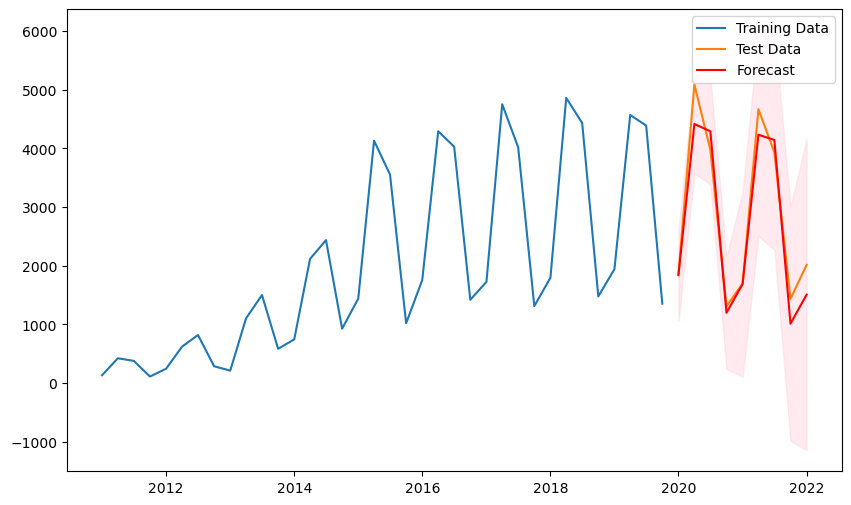

In [82]:
# Fit the model with the best parameters
best_model = SARIMAX(train['Generation (GWh)'], order=best_params[0], seasonal_order=best_params[1])
results = best_model.fit()

# Forecast the test set
forecast = results.get_forecast(steps=len(test))
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# Plot the forecasts with confidence intervals
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Generation (GWh)'], label='Training Data')
plt.plot(test.index, test['Generation (GWh)'], label='Test Data')
plt.plot(test.index, forecast_mean, label='Forecast', color='red')
plt.fill_between(test.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.show()


In [85]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate metrics
mse = mean_squared_error(test['Generation (GWh)'], forecast_mean)
mae = mean_absolute_error(test['Generation (GWh)'], forecast_mean)
rmse = mse ** 0.5

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')


Mean Squared Error: 137212.27324159213
Mean Absolute Error: 300.2519501069349
Root Mean Squared Error: 370.421750497446


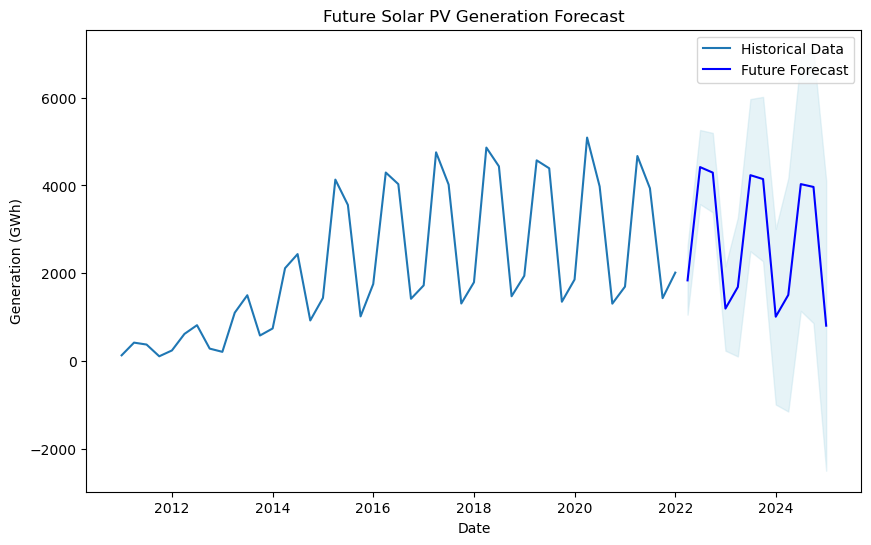

In [87]:
# Forecast future quarters
future_steps = 12 
future_forecast = results.get_forecast(steps=future_steps)
future_forecast_mean = future_forecast.predicted_mean
future_conf_int = future_forecast.conf_int()

# Combine with historical data
plt.figure(figsize=(10, 6))
plt.plot(combined_df.index, combined_df['Generation (GWh)'], label='Historical Data')
plt.plot(pd.date_range(test.index[-1], periods=future_steps, freq='Q'), future_forecast_mean, label='Future Forecast', color='blue')
plt.fill_between(pd.date_range(test.index[-1], periods=future_steps, freq='Q'), 
                 future_conf_int.iloc[:, 0], 
                 future_conf_int.iloc[:, 1], 
                 color='lightblue', alpha=0.3)
plt.title('Future Solar PV Generation Forecast')
plt.xlabel('Date')
plt.ylabel('Generation (GWh)')
plt.legend()
plt.show()